## 4.10 Final Analysis Part II

### Contents
#### Importing Libraries
#### Importing Data
#### Examine Profiling Variables
#### Create Age Group Column
#### Create Income Bracket Column
#### Create a Family Role Column
#### Export to Pickle

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data

In [4]:
# Define pathway to relevant folder
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/07-2024 Instacart Basket Analysis'

In [5]:
# Import sample_100k.pkl
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'sample_100k.pkl'))

### Examine profiling variables

In [11]:
# See columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_placed', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'med_days_prior', 'frequency_flag', 'Unnamed: 0',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge', 'region', 'Activity'],
      dtype='object')

In [13]:
df['age'].value_counts(dropna = False)

age
64    1689
69    1665
21    1659
48    1645
68    1643
      ... 
33    1479
41    1463
58    1463
78    1450
66    1426
Name: count, Length: 64, dtype: int64

In [15]:
df['n_dependants'].value_counts(dropna = False)

n_dependants
2    25147
0    25125
3    25027
1    24929
Name: count, dtype: int64

In [17]:
df['fam_status'].value_counts(dropna = False)

fam_status
married                             70257
single                              16552
divorced/widowed                     8573
living with parents and siblings     4846
Name: count, dtype: int64

In [19]:
df['income'].value_counts(dropna = False)

income
99954     17
99155     17
118816    16
112610    16
107034    15
          ..
72750      1
114202     1
64030      1
106200     1
93240      1
Name: count, Length: 48786, dtype: int64

<Axes: ylabel='Frequency'>

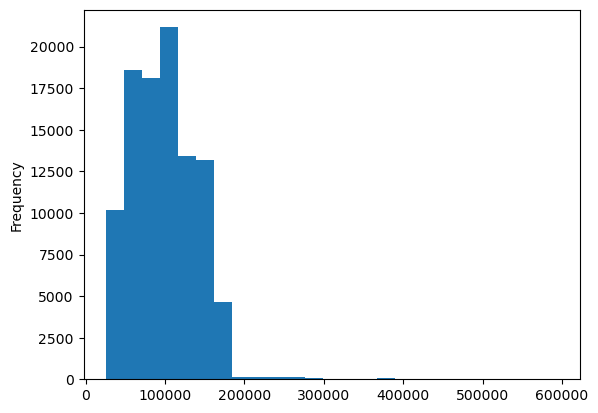

In [11]:
df['income'].plot.hist(bins = 25)

### Create Age Group Column

In [ ]:
# Create an age group variable
df.loc[df['age'] < 35, 'age_group'] = 'young adult'

df.loc[(df['age'] >= 35) & (df['age'] < 50), 'age_group'] = 'adult'

df.loc[(df['age'] >=50) & (df['age'] <=65), 'age_group'] = 'older adult'

df.loc[df['age'] >= 65, 'age_group'] = 'senior'

In [21]:
df['age_group'].value_counts(dropna = False)

age_group
young adult    26786
senior         26547
adult          23558
older adult    23337
Name: count, dtype: int64

### Create Income Bracket Column

In [ ]:
# Create an income type variable
df.loc[df['income'] < 50000, 'income_group'] = 'low-income'

df.loc[(df['income'] >= 50000) & (df['income'] < 150000), 'income_group'] = 'middle-income'

df.loc[df['income'] >= 150000, 'income_group'] = 'high-income'

In [32]:
df['income_group'].value_counts(dropna = False)

income_group
middle-income    76584
high-income      12905
low-income       10739
Name: count, dtype: int64

### Create a Family-Role Column

In [ ]:
# Create a variable based on 'fam_status' and 'n_dependants'
df.loc[(df['n_dependants'] > 0) & (df['fam_status'] == 'married'), 'family_role'] = 'married parent'

df.loc[(df['n_dependants'] > 0) & (df['fam_status'] != 'married'), 'family_role'] = 'single parent'

df.loc[(df['n_dependants'] == 0) & (df['fam_status'] == 'married'), 'family_role'] = 'married childless'

df.loc[(df['n_dependants'] == 0) & (df['fam_status'] != 'married'), 'family_role'] = 'single childless'

In [47]:
df['family_role'].value_counts(dropna = False)

family_role
married parent      70257
single childless    25125
single parent        4846
Name: count, dtype: int64

In [65]:
df_childless = df.loc[df['n_dependants'] == 0]

In [67]:
df_childless

,order_id,user_id,order_number,orders_day_of_week,order_hour_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,_merge,region,Activity,age_group,income_group,family_role
2088,1716848,21,7,5,9,28.0,48988,2,1,Unsweetened Premium Iced Tea,...,6/18/2019,0,divorced/widowed,124643,both,West,High,senior,middle-income,single childless
2199,1735495,21,27,3,8,9.0,22275,1,0,Sriracha Hot Chili Sauce,...,6/18/2019,0,divorced/widowed,124643,both,West,High,senior,middle-income,single childless
2685,1149132,27,21,2,11,8.0,3098,8,1,Lavender Dish Soap,...,4/25/2018,0,divorced/widowed,110170,both,Northeast,High,senior,middle-income,single childless
2847,933179,27,51,2,9,5.0,14233,2,1,Natural Artesian Water,...,4/25/2018,0,divorced/widowed,110170,both,Northeast,High,senior,middle-income,single childless
3025,1560223,27,68,2,8,4.0,27086,1,1,Half & Half,...,4/25/2018,0,divorced/widowed,110170,both,Northeast,High,senior,middle-income,single childless
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400982,792593,206188,4,5,12,30.0,35898,4,1,Original Hot Sauce,...,9/7/2018,0,single,32772,both,Northeast,High,adult,low-income,single childless
32401558,1765908,206193,37,0,12,2.0,47719,6,1,Banana Raspberry & Brown Rice Stage 2,...,6/27/2019,0,single,70597,both,West,High,adult,middle-income,single childless
32402134,3302466,206199,1,2,11,NaN,7781,3,0,Organic Sticks Low Moisture Part Skim Mozzarel...,...,12/9/2017,0,divorced/widowed,144953,both,West,High,older adult,middle-income,single childless
32402259,1231231,206199,9,1,13,13.0,34254,6,1,White Facial Tissues,...,12/9/2017,0,divorced/widowed,144953,both,West,High,older adult,middle-income,single childless


In [75]:
df_childless2 = df_childless.loc[df_childless['fam_status'] == 'married']
df_childless2

,order_id,user_id,order_number,orders_day_of_week,order_hour_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,_merge,region,Activity,age_group,income_group,family_role


#### There are no married people without dependants in this dataframe, which must be because it's artificial.

### Export to pickle

In [79]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'sample_w_profiling.pkl'))